In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame({
    'juego': ['Juego1', 'Juego2', 'Juego3', 'Juego4', 'Juego5', 'Juego6', 'Juego7', 'Juego8', 'Juego9', 'Juego10'],
    'plataformas': ['PC', 'PS4', 'XBOX', 'SWITCH', 'PC', 'PS4', 'XBOX', 'SWITCH', 'PC', 'PS4'],
    'genero': ['Aventura', 'Accion', 'RPG', 'Deportes', 'Aventura', 'Accion', 'RPG', 'Deportes', 'Aventura', 'Accion']
})

fechas_aleatorias = pd.to_datetime(
    np.random.choice(pd.date_range("2010-01-01", "2023-12-31"), size=10)
)

df['ventas_mundiales'] = np.random.randint(1, 10000001, size=len(df))
df['fecha_lanzamiento']= fechas_aleatorias
df['calificacion'] = np.random.uniform(1, 10, size=len(df)).round(1)

In [ ]:
#Se realizo una copia con los valores brindados, para no perder la información original
#por si se ejecuta de nuevo el código para no perder el analisis de las  graficas

##df.to_csv('df.csv', index=False)  Guardar el DataFrame en un archivo CSV

df= pd.read_csv('df.csv')

In [13]:
df

,juego,plataformas,genero,ventas_mundiales,fecha_lanzamiento,calificacion
0,Juego1,PC,Aventura,7834393,8/18/2019,7.7
1,Juego2,PS4,Accion,3842304,10/26/2023,2.5
2,Juego3,XBOX,RPG,3746974,2/10/2016,2.1
3,Juego4,SWITCH,Deportes,4005425,7/31/2012,1.0
4,Juego5,PC,Aventura,4432564,8/28/2013,8.3
5,Juego6,PS4,Accion,8777962,10/21/2015,10.0
6,Juego7,XBOX,RPG,2403050,12/4/2011,5.0
7,Juego8,SWITCH,Deportes,1239309,5/14/2021,7.6
8,Juego9,PC,Aventura,8498165,8/27/2012,8.9
9,Juego10,PS4,Accion,9760143,5/2/2022,4.2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   juego              10 non-null     object 
 1   plataformas        10 non-null     object 
 2   genero             10 non-null     object 
 3   ventas_mundiales   10 non-null     int64  
 4   fecha_lanzamiento  10 non-null     object 
 5   calificacion       10 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes


In [15]:
#Media de las ventas
mean_value = round(df['ventas_mundiales'].mean())
print("La media de las ventas es:", mean_value)

La media de las ventas es: 5454029


In [16]:
#Mediana de las ventas
mean_value = round(df['ventas_mundiales'].median())
print("La mediana de las ventas es:", mean_value)

La mediana de las ventas es: 4218994


In [17]:
df.value_counts('juego')    


juego
Juego1     1
Juego10    1
Juego2     1
Juego3     1
Juego4     1
Juego5     1
Juego6     1
Juego7     1
Juego8     1
Juego9     1
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2108\2682424451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=juegos_genero.index, y=juegos_genero.values, palette='coolwarm', hue=None)


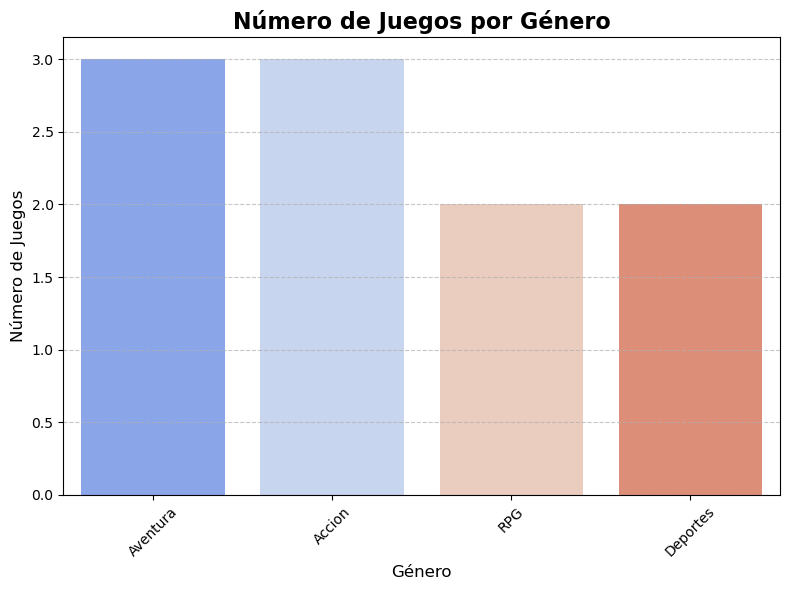

In [37]:
# Número de juegos por género
plt.figure(figsize=(8, 6))
sns.barplot(x=juegos_genero.index, y=juegos_genero.values, palette='coolwarm', hue=None)

# Personalización de la gráfica
plt.title('Número de Juegos por Género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Juegos', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7) 

# Mostrar la gráfica
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2108\3967810839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='juego', y='ventas_mundiales', data=df, palette='viridis', hue=None)


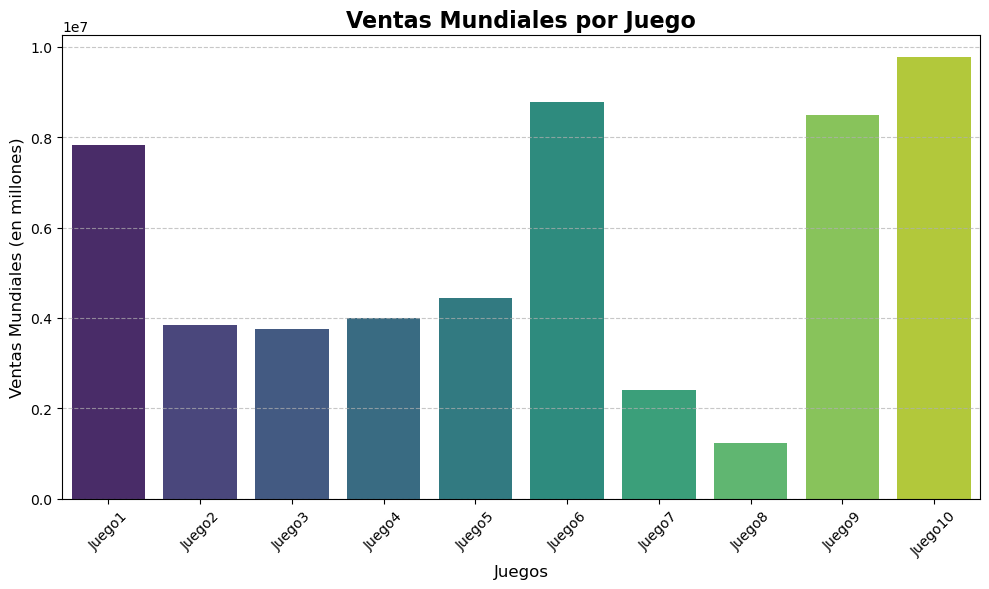

In [33]:
# Ventas mundiales por juego
plt.figure(figsize=(10, 6))
sns.barplot(x='juego', y='ventas_mundiales', data=df, palette='viridis', hue=None)

# Personalización de la gráfica
plt.title('Ventas Mundiales por Juego', fontsize=16, fontweight='bold')
plt.xlabel('Juegos', fontsize=12)
plt.ylabel('Ventas Mundiales (en millones)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


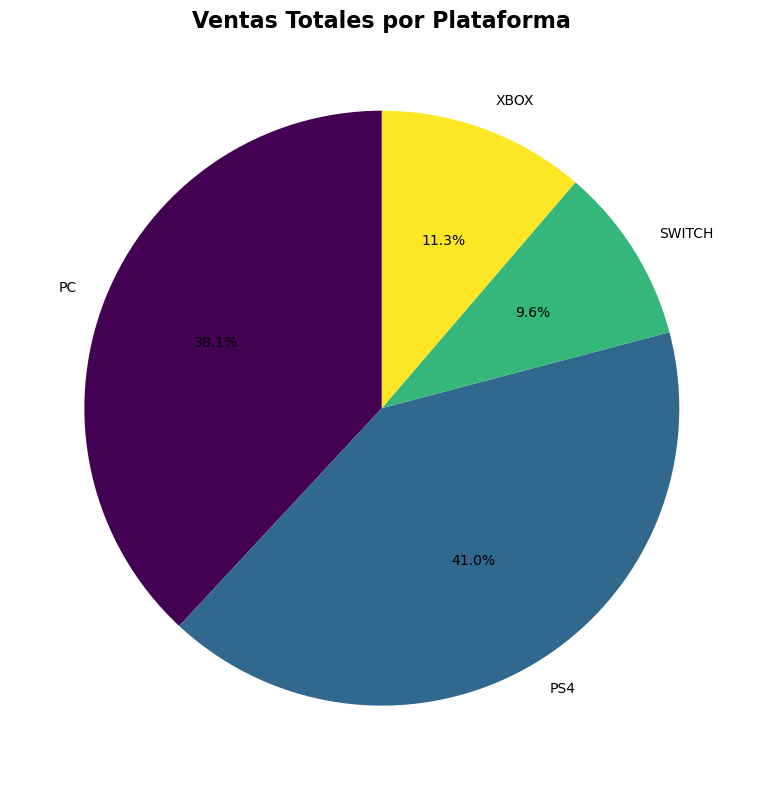

In [41]:
# Ventas totales por plataforma
ventas_por_plataforma = df.groupby('plataformas')['ventas_mundiales'].sum()

plt.figure(figsize=(8, 8)) 
ventas_por_plataforma.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='viridis',
)

# Personalización de la gráfica
plt.title('Ventas Totales por Plataforma', fontsize=16, fontweight='bold')
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.tight_layout() 

# Mostrar la gráfica
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2108\3306582338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="year_Lanzamiento", data=df, palette="coolwarm")  # Usar una paleta de colores atractiva


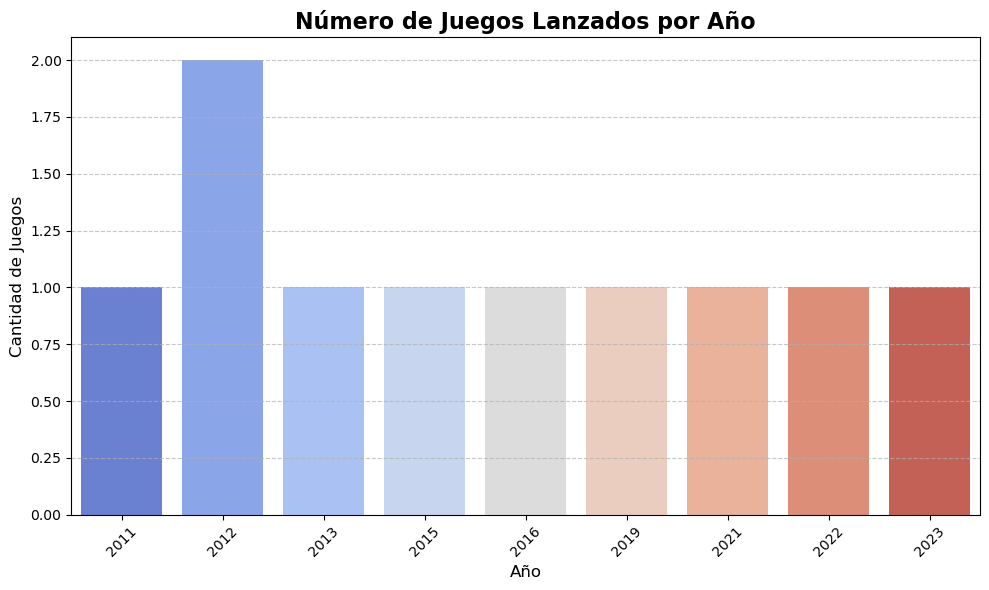

In [ ]:
# Extraer el año de la fecha de lanzamiento
df["year_Lanzamiento"] = df["fecha_lanzamiento"].dt.year

# Graficar el número de juegos lanzados por año
plt.figure(figsize=(10, 6)) 
sns.countplot(x="year_Lanzamiento", data=df, palette="coolwarm") 

# Personalización de la gráfica
plt.title("Número de Juegos Lanzados por Año", fontsize=16, fontweight="bold")
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad de Juegos", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2108\4239580453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, palette="coolwarm")


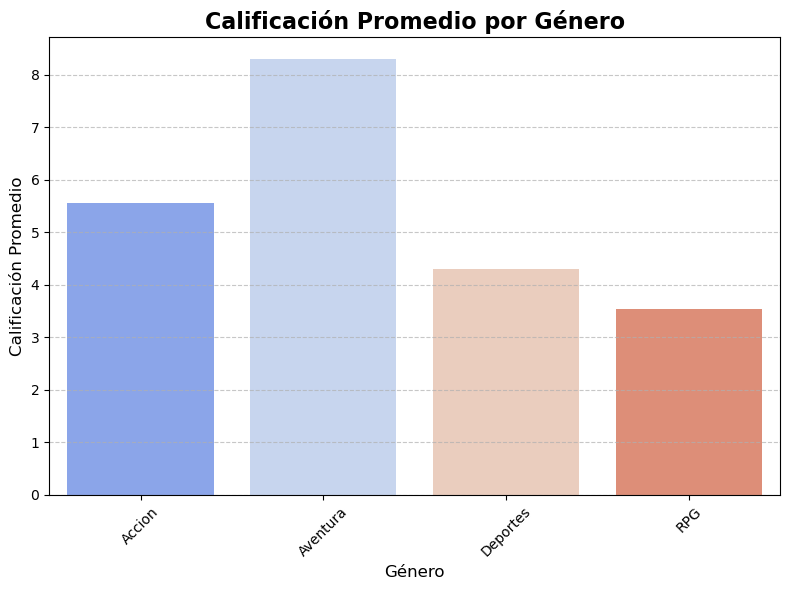

In [55]:
# Calificación promedio por género
calificacion_promedio = df.groupby('genero')['calificacion'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, palette="coolwarm")

# Personalización de la gráfica
plt.title('Calificación Promedio por Género', fontsize=16, fontweight='bold') 
plt.xlabel('Género', fontsize=12)  
plt.ylabel('Calificación Promedio', fontsize=12)  
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7) 

# Mostrar la gráfica
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2108\2514522663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=juegos_por_plataforma.index, y=juegos_por_plataforma.values, palette="viridis")


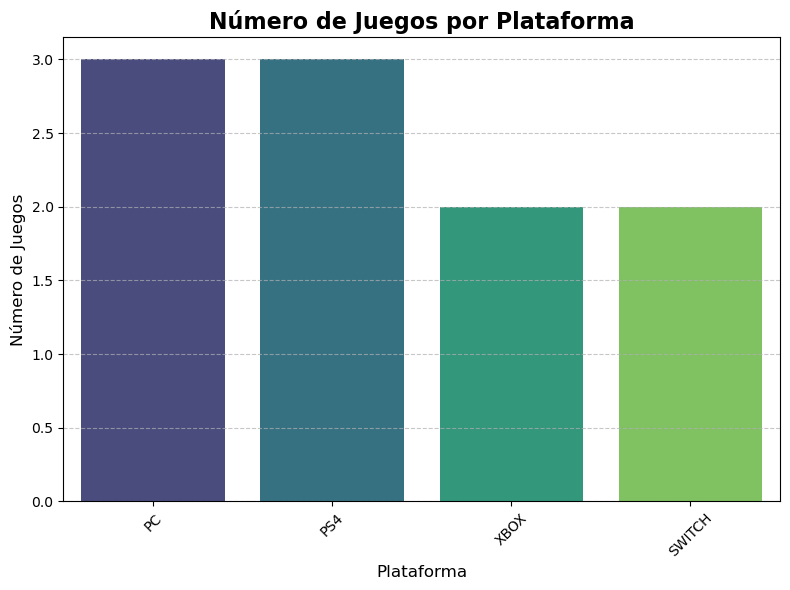

In [56]:
# Número de juegos por plataforma
juegos_por_plataforma = df['plataformas'].value_counts()

plt.figure(figsize=(8, 6)) 
sns.barplot(x=juegos_por_plataforma.index, y=juegos_por_plataforma.values, palette="viridis") 

# Personalización de la gráfica
plt.title('Número de Juegos por Plataforma', fontsize=16, fontweight='bold') 
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Número de Juegos', fontsize=12) 
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7) 

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#PREGUNTA 2, LIMPIEZA DE DATOS

R//: Lo primero que se debe de hacer es analizar el conjunto de datos que se va a trabajar, identificar los objetivos y problemas planteados; luego de entender el problema vamos a verificar con el conjuntos de datos, se hace un analisis muy general con .info(), asi entedemos los tipos de datos que se estan usando y la cantidad clasificados con la columna, asi nos daremos cuenta si se encuentran datos faltantes, luego buscaria dentro del df si todos los datos estan almacenados en las columnas correctas, porque hay casos donde hay datos vacios y eso hace que se corran los datos de las columnas.
Ya luego de identificar los datos faltantes en el caso de las columnas Ventas_Mundiales y Calificacion, al ser columnas con datos numericos podria implementar un recorrido de la media de cada columna y lo implementaria para agregar ese valor faltante, dado el caso de que sean muy pocos los valores faltantes dentro del df se podria optar por la opcion de eliminar las filas que tengan vacios, siempre y cuando sea un porcentaje bajo y no represente ningun cambio en analisis del df.
 

Codigo para implementar la media:
col_num = ['ventas_mundiales']

for col in col_num:
    df[col] = df[col].fillna(df[col].mean())
df[col_num].isnull().sum()

Codigo para filas con datos faltantes:
df = df.dropna(subset=['calificacion'])


PARTE 2

In [60]:
# Venta promedio de películas por año
def avg_ventas_year(df):    
    # Calcular las ventas promedio por año
    avg_ventas = df.groupby('year_Lanzamiento')['ventas_mundiales'].mean()
    
    # Gráfico
    plt.figure(figsize=(10, 6)) 
    plt.plot(avg_ventas.index, avg_ventas.values, marker='o', linestyle='-', color='b', label='Ventas promedio') 
    
    # Personalización de la gráfica
    plt.title('Ventas Promedio por Año', fontsize=16, fontweight='bold')
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Ventas Promedio (millones)', fontsize=12) 
    plt.xticks(fontsize=10, rotation=45) 
    plt.yticks(fontsize=10) 
    plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)  
    plt.legend(fontsize=10) 
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

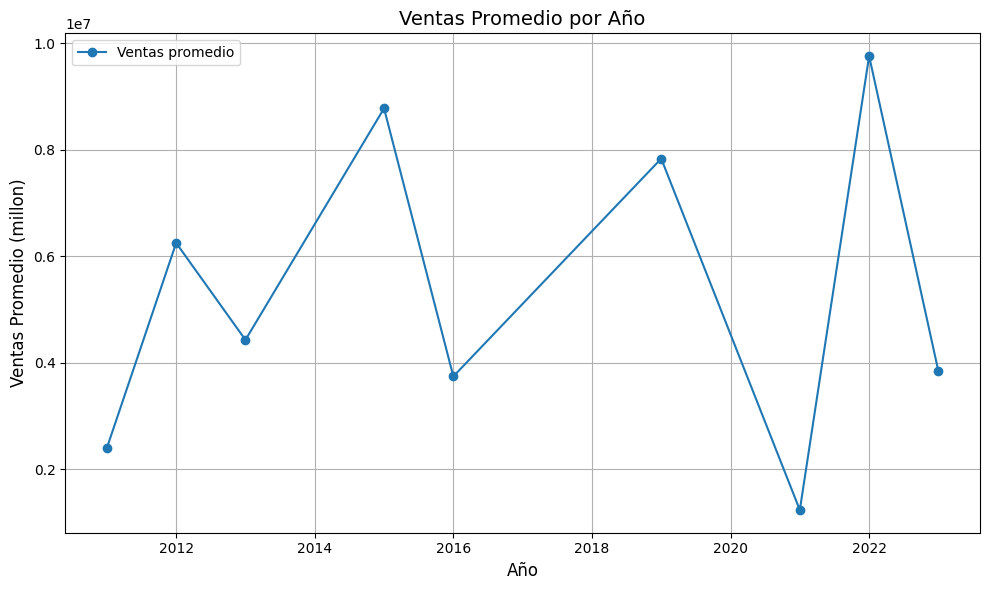

In [157]:
avg_ventas_year(df)

En la gráfica se evidencia un patrón muy irregular, con marcados picos de aumento y caída en el promedio de ventas.

2011: Se observa un crecimiento significativo, casi triplicando el promedio inicial.

2012-2019: Durante este período se presenta un patrón cíclico de caídas y recuperaciones. Estos repuntes podrían estar relacionados con el lanzamiento de nuevas consolas al mercado, lo cual atrajo a nuevos usuarios.

2019-2021: Se presenta la mayor caída en las ventas promedio. Uno de los principales factores pudo haber sido la pandemia, que afectó gravemente la economía global. Muchas personas perdieron sus empleos y priorizaron gastos esenciales, además del auge de juegos gratuitos, que disminuyó la compra de juegos pagos.

2022: Se registra el mayor aumento en las ventas promedio de todo el período. Esto podría atribuirse a la recuperación económica post-pandemia y al lanzamiento de consolas de nueva generación, como el PS5.

2023: Contrario a lo que se podría esperar, las ventas vuelven a caer, lo que indica que además del patrón cíclico, existen otros factores externos e internos que afectan el comportamiento del mercado.

Es muy probable que para el siguiente año tenga un crecimiento notorio con respecto a la caida presenciada en el año 2022, ya que se logra identificar un patron que despues de cada caida en el promedio viene un crecimiento.

    -Pregunta 4-

Para estructurar los datos de una mejor manera, almacenaria los datos sobre los jugadores con los siguientes datos: (id, nombre, fecha_nacimiento, username, region, pais, historial_compras, horas_jugadas)

Ejemplo:
   {
        "id": col0001,
        "nombre": "Daniel Alejandro Rincón Valencia",
        "fecha_nacimiento": "2001-12-28",
        "username": "danielrincon28",
        "region": "Latam-Norte",
        "pais": "Colombia",
        "historial_compras": [
            {
                "juego": "Juego1",
                "fecha_compra": "2023-01-10",
                "precio": 59.99
            },
            {
                "juego": "Juego2",
                "fecha_compra": "2023-03-05",
                "precio": 49.99
            }
        ],
        "horas_jugadas": 120
    },

-Pregunta 5-

Matriz de correlación:
                  ventas_mundiales  calificacion
ventas_mundiales          1.000000      0.373265
calificacion              0.373265      1.000000


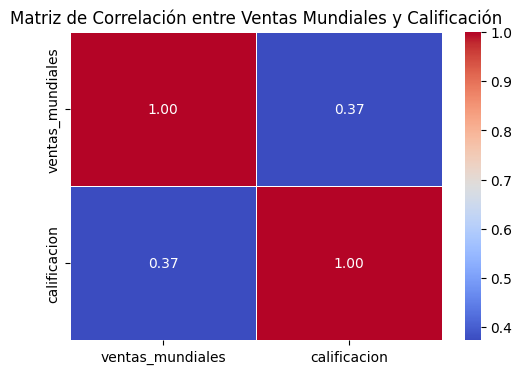

In [ ]:
correlacion = df[['ventas_mundiales', 'calificacion']].corr()
print("Matriz de correlación:")
print(correlacion)

# Matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Ventas Mundiales y Calificación')
plt.show()

La correlación entre ventas mundiales y calificación es positiva pero baja (0.37), lo que indica que una mejor calificación puede influir en las ventas, pero no es un factor determinante. Existen otros elementos más relevantes que afectan las ventas globales de los videojuegos, como el marketing, la plataforma o la popularidad de la franquicia

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2108\3015163516.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Plataforma', y='Promedio_Ventas', data=avg_ventas_plataforma, palette='viridis')


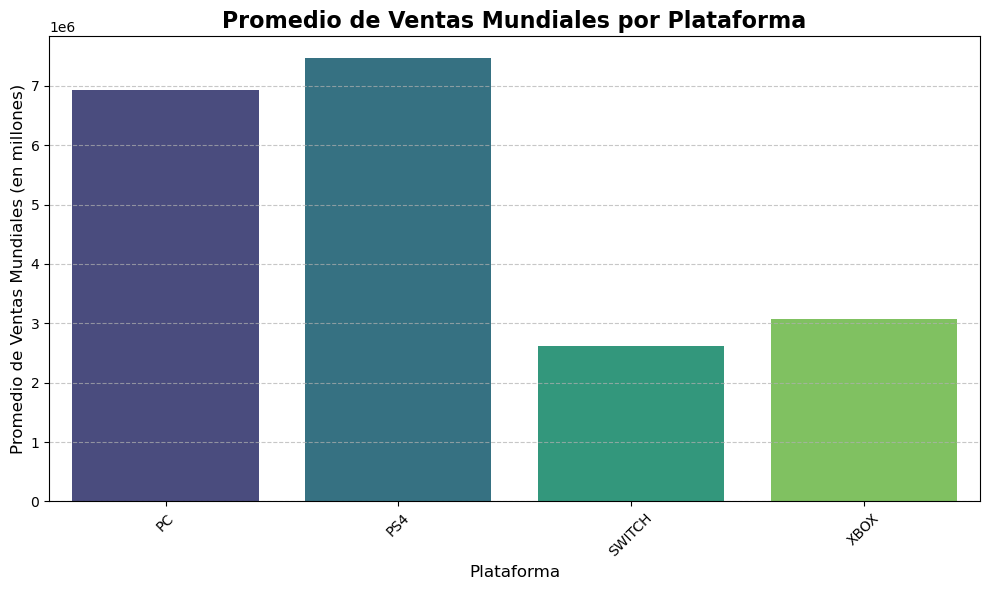

In [61]:
# Promedio de ventas mundiales por plataforma
avg_ventas_plataforma = df.groupby('plataformas')['ventas_mundiales'].mean().reset_index()
avg_ventas_plataforma.columns = ['Plataforma', 'Promedio_Ventas']

plt.figure(figsize=(10, 6))
sns.barplot(x='Plataforma', y='Promedio_Ventas', data=avg_ventas_plataforma, palette='viridis')  

# Personalización de la gráfica
plt.title('Promedio de Ventas Mundiales por Plataforma', fontsize=16, fontweight='bold')  
plt.xlabel('Plataforma', fontsize=12) 
plt.ylabel('Promedio de Ventas Mundiales (en millones)', fontsize=12)  
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10) 
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7) 

# Mostrar la gráfica
plt.tight_layout()  
plt.show()

--RESUMEN EJECUTIVO--

PS4 lidera las ventas totales junto con el genero de accion que lidera con (23.8M) las ventas y representa el (38%), acción solo se distribuyó en PS4. Las ventas fluctuan mucho pero conservan un mismo patron, despues de cada caida viene un alza. La economia en pandemia influyó de manera negativa las ventas. El juego10 es de accion y es el mas vendido. El promedio de calificaciones mas altas lo tiene RPG y Aventura, tener mejores calificaciones no es sinonimo de mayor numero de ventas, solo un porcentaje. 2012 fue el año con mas cantidad de juego lanzados (2). Las plataformas PC y PS4 son las mas apetecidas. El pico mas alto de ventas fue en el año 2022, influyendo la salida de nuevos juegos y las consolas de nueva generación. La calificación no influye en la cantidad de ventas.

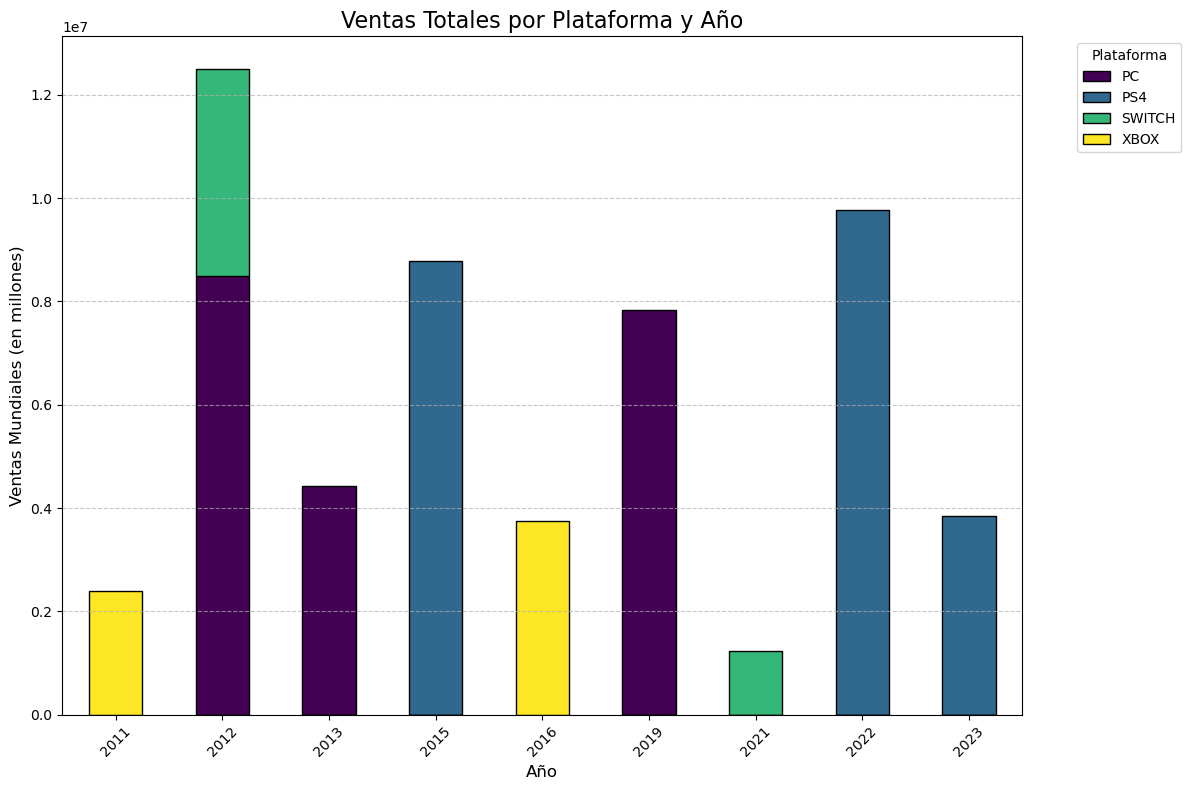

In [64]:
# Ventas totales por plataforma y año

ventas_por_plataforma_year_Lanzamiento = df.groupby(['year_Lanzamiento', 'plataformas'])['ventas_mundiales'].sum().unstack()
ventas_por_plataforma_year_Lanzamiento.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='black')

plt.title('Ventas Totales por Plataforma y Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Mundiales (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La visualización mas relevante son las ventas totales de plataformas por año, porque proporciona una visión histórica y detallada del comportamiento de las ventas en función del tiempo y las plataformas, esto será de gran ayuda para tomar diferentes decisiones estretegicas que ayuden a mejorar las ventas por año y por plataforma.